<a href="https://colab.research.google.com/github/SabastianGu/diabetes_preds/blob/main/Tensorflow_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diabetes study with Tensorflow 2.0

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
!wget https://lazyprogrammer.me/course_files/exercises/diabetes.csv

--2024-09-06 08:23:45--  https://lazyprogrammer.me/course_files/exercises/diabetes.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/csv]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2024-09-06 08:23:46 (90.4 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [151]:
data = pd.read_csv('./diabetes.csv')
data.BMI.replace(0, data.BMI.mean(), inplace = True)
data.SkinThickness.replace(0, data.SkinThickness.mean(), inplace = True)
data.Insulin.replace(0, data.Insulin.mean(), inplace = True)
data.BloodPressure.replace(0, data.BloodPressure.mean(), inplace = True)
data.Glucose.replace(0, data.Glucose.mean(), inplace = True)

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(data.drop(["Outcome"], axis = 1),),
                columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                          'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data['Outcome']

train_split = round(0.7 * len(data)) # 70% of data
valid_split = round(train_split + 0.15 * len(data))

X_train, y_train = x[:train_split], y[:train_split]
X_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = x[valid_split:], y[valid_split:]



N, D = x.shape
scaled_X_train = scaler.fit_transform(X_train)

scaled_X_valid = scaler.transform(X_valid)

scaled_X_test = scaler.transform(X_test)


In [152]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [153]:
print(X_train.shape, scaled_X_train.shape)

(538, 8) (538, 8)


In [154]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D, )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.keras", monitor = "val_accuracy", save_best_only = True, mode = "max")
r = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 100, batch_size = 32, verbose = 1, callbacks = [checkpoint])


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6662 - loss: 0.6198 - val_accuracy: 0.8174 - val_loss: 0.4425
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7593 - loss: 0.4897 - val_accuracy: 0.8348 - val_loss: 0.3808
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7841 - loss: 0.4475 - val_accuracy: 0.8609 - val_loss: 0.3601
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7857 - loss: 0.4436 - val_accuracy: 0.8522 - val_loss: 0.3566
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7941 - loss: 0.4335 - val_accuracy: 0.8522 - val_loss: 0.3526
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8051 - loss: 0.4343 - val_accuracy: 0.8348 - val_loss: 0.3465
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7936 - loss: 0.4221 - val_accuracy: 0.8348 - val_loss: 0.3508
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8195 - loss: 0.4203 - val_accuracy: 0.8435 - 

In [156]:
best_model = tf.keras.models.load_model('best_model.keras')

In [157]:
y_pred =(best_model.predict(X_test) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("confusion matrix :")
print(conf_matrix)
print("\n")
print("precision % :", accuracy * 100, '%', '\n')
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
confusion matrix :
[[59 11]
 [17 28]]


precision % : 75.65217391304347 % 

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        70
           1       0.72      0.62      0.67        45

    accuracy                           0.76       115
   macro avg       0.75      0.73      0.74       115
weighted avg       0.75      0.76      0.75       115



<Axes: >

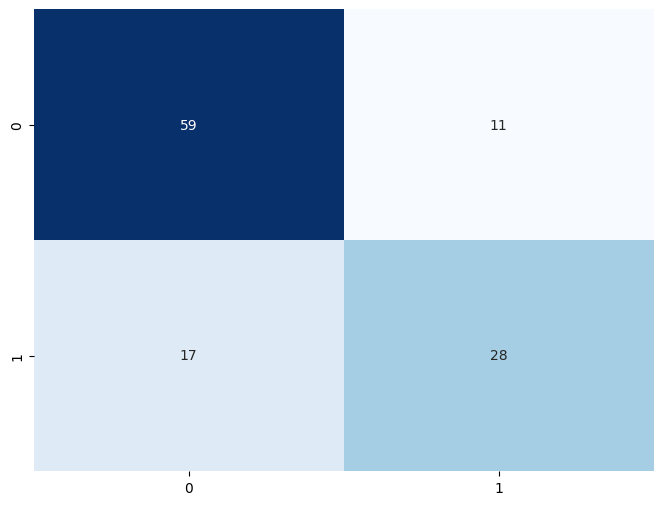

In [158]:
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Blues", cbar = False)

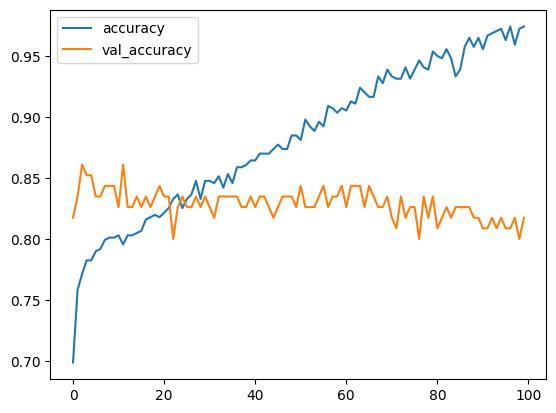

In [159]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [160]:
from sklearn.tree import DecisionTreeClassifier

DcT = DecisionTreeClassifier()

DcT.fit(X_train, y_train)
y_preds = DcT.predict(X_test)

conf_matrix = confusion_matrix(y_preds, y_test)
accuracy = accuracy_score(y_preds, y_test)

print("Matrice de confusion :")
print(conf_matrix)
print("\nPrécision :", accuracy * 100, "%\n")
print(classification_report(y_test, y_pred))

Matrice de confusion :
[[51 21]
 [19 24]]

Précision : 65.21739130434783 %

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        70
           1       0.72      0.62      0.67        45

    accuracy                           0.76       115
   macro avg       0.75      0.73      0.74       115
weighted avg       0.75      0.76      0.75       115



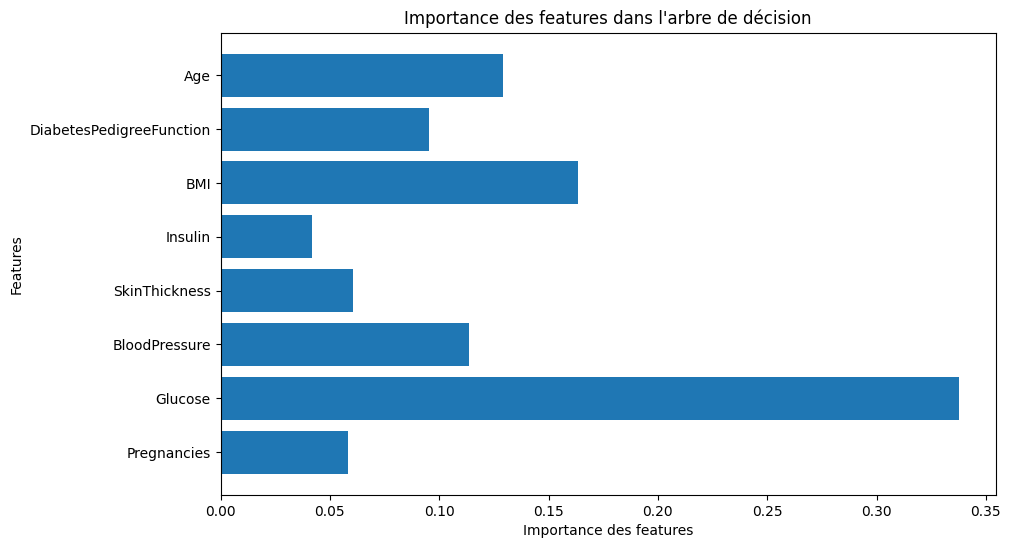

In [161]:
importances = DcT.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(x.columns, importances)
plt.xlabel('Importance des features')
plt.ylabel('Features')
plt.title('Importance des features dans l\'arbre de décision')
plt.show()

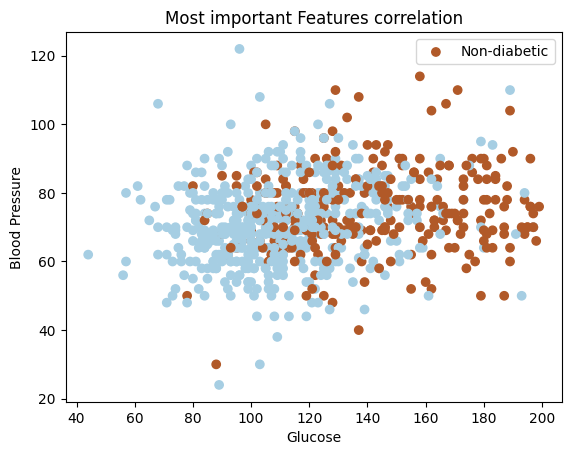

In [162]:
plt.scatter(data.Glucose, data.BloodPressure, c = data.Outcome, cmap = 'Paired')
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.title('Most important Features correlation')
plt.legend(['Non-diabetic', 'Diabetic'])
